# Training
train.ipynb executes the same commands as train.py 


In [1]:
import math
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

2023-10-10 17:44:30.907086: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Generate the sine data

The x values are 1000 random values between 0 and 2*pi

In [2]:
x_values = np.random.uniform(low=0, high=2 * math.pi, size=1000).astype(np.float32)

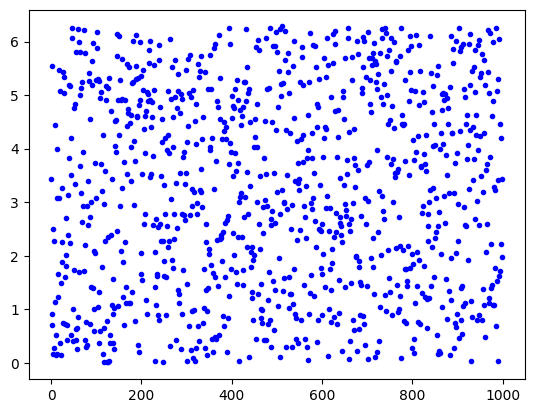

In [3]:
plt.plot(x_values,"b.")

Calculate the sine values

In [4]:
y_values = np.sin(x_values)

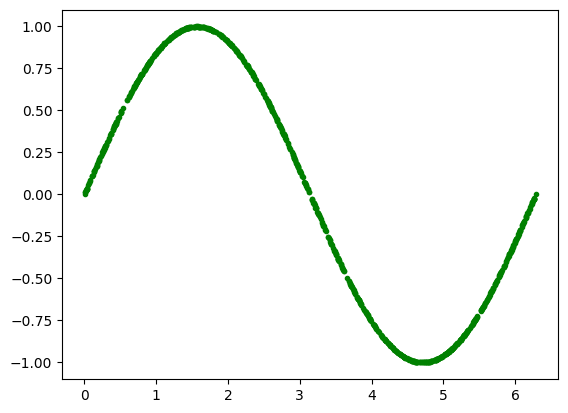

In [5]:
plt.plot(x_values,y_values,"g.")

Create the model

In [6]:
model = tf.keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model.add(tf.keras.layers.Dense(16, activation = "relu",input_shape=(1, )))
# The new second and third layer will help the network learn more complex
# representations
model.add(tf.keras.layers.Dense(16,activation = "relu"))
# Compile the model using the standard 'adam' optimizer and the mean squared
# error or 'mse' loss function for regression.
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

2023-10-10 17:44:43.078345: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3509 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0


Now we train the model

In [8]:
epochs = 500
model.fit(x_values,y_values,
          epochs=epochs,
          validation_split=0.2,
          batch_size=64,
          verbose=2)

Epoch 1/500


2023-10-10 17:45:52.544009: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55dc74ee0890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-10 17:45:52.544049: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 950M, Compute Capability 5.0
2023-10-10 17:45:52.556211: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-10 17:45:52.675981: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2023-10-10 17:45:52.884354: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 - 2s - loss: 0.6667 - mae: 0.7074 - val_loss: 0.6535 - val_mae: 0.7167 - 2s/epoch - 151ms/step
Epoch 2/500
13/13 - 0s - loss: 0.6016 - mae: 0.6854 - val_loss: 0.5969 - val_mae: 0.6943 - 127ms/epoch - 10ms/step
Epoch 3/500
13/13 - 0s - loss: 0.5551 - mae: 0.6662 - val_loss: 0.5570 - val_mae: 0.6743 - 112ms/epoch - 9ms/step
Epoch 4/500
13/13 - 0s - loss: 0.5236 - mae: 0.6498 - val_loss: 0.5352 - val_mae: 0.6619 - 116ms/epoch - 9ms/step
Epoch 5/500
13/13 - 0s - loss: 0.5062 - mae: 0.6398 - val_loss: 0.5203 - val_mae: 0.6524 - 99ms/epoch - 8ms/step
Epoch 6/500
13/13 - 0s - loss: 0.4958 - mae: 0.6329 - val_loss: 0.5153 - val_mae: 0.6487 - 110ms/epoch - 8ms/step
Epoch 7/500
13/13 - 0s - loss: 0.4930 - mae: 0.6308 - val_loss: 0.5132 - val_mae: 0.6472 - 89ms/epoch - 7ms/step
Epoch 8/500
13/13 - 0s - loss: 0.4911 - mae: 0.6293 - val_loss: 0.5112 - val_mae: 0.6458 - 104ms/epoch - 8ms/step
Epoch 9/500
13/13 - 0s - loss: 0.4892 - mae: 0.6278 - val_loss: 0.5096 - val_mae: 0.6446 - 94ms/epoch 

Convert the model to tflite

In [10]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpox6um2j9/assets


INFO:tensorflow:Assets written to: /tmp/tmpox6um2j9/assets
2023-10-10 17:48:22.229723: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-10-10 17:48:22.229759: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-10-10 17:48:22.231105: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpox6um2j9
2023-10-10 17:48:22.232753: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-10-10 17:48:22.232775: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpox6um2j9
2023-10-10 17:48:22.241844: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2023-10-10 17:48:22.243633: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-10-10 17:48:22.304436: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

Save the model

In [12]:
model_name = "hello_world_model.tflite"
if not os.path.exists("models"):
    os.makedirs("models")
save_path = os.path.join("models/", model_name)
with open(save_path, "wb") as f:
    f.write(tflite_model)